# Group 5 

**Notice: this script is intended to be run in order**


**if met any problem, please consider restart from the start**


# Data Preprocessing:

In [1]:
# Data processing package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Trainning package
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

# time measurement
import time

## Dataset1 adult_income

In [2]:
# Data Processing for adult.data && adult.test
# Note: data file is deleted after runtime, please load the data yourself to run
# Dataset: adult.data && adult.test

# First step: load adult.data
# Read the loaded file as pandas dataframe, add column names, split to columns
data_adult = pd.read_csv('adult.data', names = ['age', 'workclass', 'fnlwgt', 'education', 
                                                         'education-num', 'marital-status','occupation', 
                                                         'relationship', 'race', 'sex', 'capital-gain', 
                                                         'capital-loss', 'hours-per-week', 'native-country','income'], 
                                                          skipinitialspace=True) # omit the inital spaces in csv
test_adult = pd.read_csv('adult.test', names = ['age', 'workclass', 'fnlwgt', 'education', 
                                                         'education-num', 'marital-status','occupation', 
                                                         'relationship', 'race', 'sex', 'capital-gain',
                                                         'capital-loss', 'hours-per-week', 'native-country','income'], 
                                                          skipinitialspace=True) # omit the inital spaces in csv
test_adult = test_adult.dropna()      # to drop NA rows
test_adult['income'] = test_adult['income'].str.replace('.', '') # to remove the annoying '.' in the end of txt

In [3]:
# Pick out all row indexes with invalid value
invalidIndexes = data_adult[(data_adult['workclass'] == '?') | (data_adult['occupation'] == '?') | (data_adult['native-country'] == '?')].index # only these three columns contain invalid value
adult_train_clean = data_adult.drop(invalidIndexes)

In [4]:
# Pick out all row indexes with invalid value
invalidIndexes = test_adult[(test_adult['workclass'] == '?') | (test_adult['occupation'] == '?') | (test_adult['native-country'] == '?')].index
adult_test_clean = test_adult.drop(invalidIndexes)
adult_test_clean = adult_test_clean.dropna()

In [5]:
# import OneHotEncoder to encode discrete values
from sklearn.preprocessing import OneHotEncoder   
ohe = OneHotEncoder(handle_unknown='ignore')  # return an sparse matrix

In [6]:
# Transfer to numpy matrix
adult_train_clean=adult_train_clean.to_numpy()

In [7]:
adult_test_clean=adult_test_clean.to_numpy()

In [8]:
# One hot encode the train set

# encode corresponding columns(column: 1,3,5,6,7,8,9,13)
encode1 = ohe.fit_transform(adult_train_clean[:, [1]]).toarray()
encode3 = ohe.fit_transform(adult_train_clean[:, [3]]).toarray()
encode5 = ohe.fit_transform(adult_train_clean[:, [5]]).toarray()
encode6 = ohe.fit_transform(adult_train_clean[:, [6]]).toarray()
encode7 = ohe.fit_transform(adult_train_clean[:, [7]]).toarray()
encode8 = ohe.fit_transform(adult_train_clean[:, [8]]).toarray()
encode9 = ohe.fit_transform(adult_train_clean[:, [9]]).toarray()
encode13 = ohe.fit_transform(adult_train_clean[:, [13]]).toarray()

# to concatenate all matrix elements into one
adult_train_encode = np.concatenate([ adult_train_clean[:, [0]], encode1, adult_train_clean[:, [2]] 
                                    , encode3, adult_train_clean[:, [4]], encode5, encode6, encode7
                                    , encode8, encode9, adult_train_clean[:, 10:13], encode13
                                    , adult_train_clean[:, [14]] ], axis=1)

In [9]:
# One hot encode the test set

# encode corresponding columns(column: 1,3,5,6,7,8,9,13)
encode1 = ohe.fit_transform(adult_test_clean[:, [1]]).toarray()                                         
encode3 = ohe.fit_transform(adult_test_clean[:, [3]]).toarray()
encode5 = ohe.fit_transform(adult_test_clean[:, [5]]).toarray()
encode6 = ohe.fit_transform(adult_test_clean[:, [6]]).toarray()
encode7 = ohe.fit_transform(adult_test_clean[:, [7]]).toarray()
encode8 = ohe.fit_transform(adult_test_clean[:, [8]]).toarray()
encode9 = ohe.fit_transform(adult_test_clean[:, [9]]).toarray()
encode13 = ohe.fit_transform(adult_test_clean[:, [13]]).toarray()

# to concatenate all matrix elements into one
adult_test_encode = np.concatenate([ adult_test_clean[:, [0]], encode1, adult_test_clean[:, [2]] 
                                    , encode3, adult_test_clean[:, [4]], encode5, encode6, encode7
                                    , encode8, encode9, adult_test_clean[:, 10:13], encode13
                                    , adult_test_clean[:, [14]] ], axis=1)

In [10]:
# to compensate a dimension of missing 'native_country' in test set
adult_test_encode = np.insert(adult_test_encode, 71, 0, axis=1)

In [11]:
# pop out the label(y) of train set

adult_train_y = adult_train_encode[:, 104]  # later sklearn model can only accept 1d array
adult_train_x = adult_train_encode[:, :104]

In [12]:
# pop out the label(y) of test set

adult_test_y = adult_test_encode[:, 104]
adult_test_x = adult_test_encode[:, :104]

## Dataset2 internet firewall action

In [13]:
# Data Processing for log2.csv
# Dataset: log2.csv
data_log2 = pd.read_csv('log2.csv') # load file to pandas dataframe
# The data is already clean (didn't see missing/invalid entries)

#Cross Validation for datasets


## Dataset 1(adult.data/test)

### Setting up

In [ ]:
# Set up of train and test features and label

train_adult_x = adult_train_encode[:, :-1]
train_adult_y = adult_train_encode[:, -1]
test_adult_x = adult_test_encode[:, :-1]
test_adult_y = adult_test_encode[:, -1]

In [ ]:
# hyperparameter pool:

k_pool = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 

**Helpers**

In [ ]:
# Data splitting into train and validation; input a numpy matrix
# return the train and validation set list

def split_train_vali(dataset):
    np.random.seed(0)
    np_data_adult = dataset
    shuffle_data_adult = np.random.permutation(np_data_adult)
    split_5 = np.array_split(shuffle_data_adult,5,axis = 0)   # split into five equal size of subset for 5-fold validation
    train_and_vali = split_5
    train = []          # a list of train set
    for i in range(5):
        # each loop, using train_and_vali[i] as validation set, and rest 4 subsets to be merged into a train set
        train.append(np.concatenate((train_and_vali[(i+1)%5],train_and_vali[(i+2)%5],train_and_vali[(i+3)%5],train_and_vali[(i+4)%5])))
        # In 5-fold cross validation, when train[i] is the training set, train_and_vali[i] will be the validation set
    return train, train_and_vali

In [ ]:
# Given hyperparameter
# return the avg accuracy of five fold validation 

def knn_cross_vali(k, metric, train, train_and_vali):
    accuracy = 0
    for i in range(5):
        feature_train = train[i][:, :-1]
        label_train = train[i][:, -1]
        feature_vali = train_and_vali[i][:, :-1]
        label_vali = train_and_vali[i][:, -1]

        knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
        knn_model.fit(feature_train, label_train)
        label_pred_vali = knn_model.predict(feature_vali)
        knn_acc_vali = np.mean(label_pred_vali == label_vali)      
        accuracy += knn_acc_vali
    accuracy = accuracy/5
    return accuracy

In [ ]:
# Find best knn parameter of dataset1(adult)

import itertools
def find_best_knn_param_1(train, train_and_vali):
    # Permutate the hyperparameters, then feed into model and train
    acc_knn_cross_vali = []                                      # list to record [acc, i, j] for later plotting
    k_pool = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
    metric_pool = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  
    knn_parameter = list(itertools.product(k_pool, metric_pool)) # cartesian product of k X metric
    max_acc = 0     # max of the accuracy
    max_param = []  # hyperparameters corresponding to the max_accuracy

    # then calculate the average accuracy returned by 5-fold cross-validation with different tuning parameters:
    cnt = 0
    for i, j in knn_parameter:
        acc = knn_cross_vali(i, j, train, train_and_vali)
        print(f"#{cnt}: crossvalidation accuracy: {acc:.4f} with parameter {i} and {j}")
        if acc > max_acc:
            max_acc = acc
            max_param = (i, j)
            print(max_param)
        acc_knn_cross_vali.append([acc, i, j])  # accuracy returned as a list
        cnt += 1
    
    print(f"final max_param is: {max_param}")
    return max_param, acc_knn_cross_vali

In [ ]:
# Calculate the test set accuracy using best parameters
# return accuracy

def cal_best_knn_acc_1(max_param, test_x, test_y, train_x, train_y):
    # train the model first
    k = max_param[0]
    metric = max_param[1]
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
    knn_model.fit(train_x, train_y)
    
    # predict the value using test input
    y_pred = knn_model.predict(test_x)
    knn_acc_test = np.mean(test_y == y_pred)

    # predict the value using train input
    y_pred = knn_model.predict(train_x)
    knn_acc_train = np.mean(train_y == y_pred)

    return knn_acc_test, knn_acc_train

**Plotting function**

In [ ]:
def get_accuracy_list(acc_result,distance_func):
  KNN_accuracy_list=[]
  for i in acc_result:
    if (i[2] == distance_func):
      KNN_accuracy_list.append(float(i[0]))
    else:
      continue
  return KNN_accuracy_list

In [ ]:
def plot_cross_validation_on_KNN(K, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(K, accuracy_scores, '-*', label='train accuracy', alpha=1)
    ymax = max(accuracy_scores)
    xpos = accuracy_scores.index(ymax)
    xmax = K[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('K-Value', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(K)

### KNN

**Best model for complete train set**

In [ ]:
# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_train_encode)

# 2. Get best cross validation parameter
k_and_metric1, acc_knn_cross_vali1 = find_best_knn_param_1(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict knn
start = time.time()
knn_acc_test_100, knn_acc_train_100 = cal_best_knn_acc_1(k_and_metric1, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
knn_acc_vali_100 = knn_cross_vali(k_and_metric1[0], k_and_metric1[1], train, train_and_vali)
knn_time_100 = end - start

print(f"The best model result train set accuracy: {knn_acc_train_100}")
print(f"The best model result crossvalidation accuracy: {knn_acc_vali_100}")
print(f"The best model result test set accuracy: {knn_acc_test_100}")
print(f"The time needed to train and predict is: {knn_time_100:.4f} s")

#0: crossvalidation accuracy: 0.7208 with parameter 1 and euclidean
(1, 'euclidean')
#1: crossvalidation accuracy: 0.7284 with parameter 1 and manhattan
(1, 'manhattan')
#2: crossvalidation accuracy: 0.7149 with parameter 1 and chebyshev
#3: crossvalidation accuracy: 0.7208 with parameter 1 and minkowski
#4: crossvalidation accuracy: 0.7783 with parameter 2 and euclidean
(2, 'euclidean')
#5: crossvalidation accuracy: 0.7825 with parameter 2 and manhattan
(2, 'manhattan')
#6: crossvalidation accuracy: 0.7767 with parameter 2 and chebyshev
#7: crossvalidation accuracy: 0.7783 with parameter 2 and minkowski
#8: crossvalidation accuracy: 0.7509 with parameter 3 and euclidean
#9: crossvalidation accuracy: 0.7578 with parameter 3 and manhattan
#10: crossvalidation accuracy: 0.7477 with parameter 3 and chebyshev
#11: crossvalidation accuracy: 0.7509 with parameter 3 and minkowski
#12: crossvalidation accuracy: 0.7832 with parameter 4 and euclidean
(4, 'euclidean')
#13: crossvalidation accurac

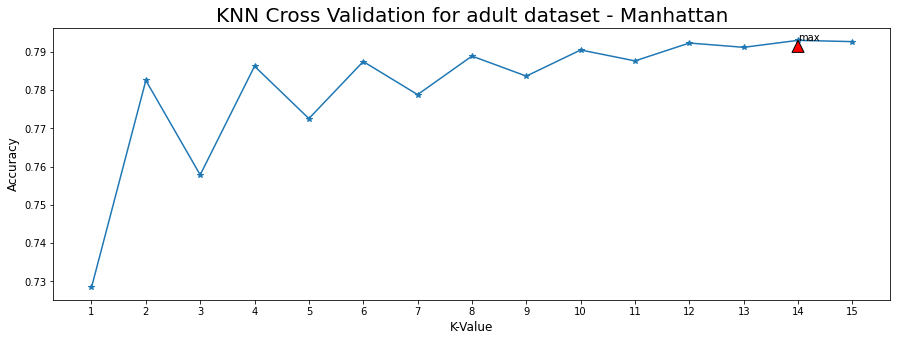

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali1,'manhattan'), "KNN Cross Validation for adult dataset - Manhattan")



---



**KNN different size**

In [ ]:
# split the adult train set into different percentage

adult_25 = np.array_split(adult_train_encode, 4, axis=0)[0]
adult_50 = np.array_split(adult_train_encode, 2, axis=0)[0]
adult_75 = np.concatenate((adult_25, adult_50), axis=0)


**Fix parameter to be k=14 and metric='manhattan'(best complete train set model), investigate how knn perform with size of data**

In [ ]:
def plot_knn_train_acc_on_datasize(x, y, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(x, y, '-*', label='train accuracy', alpha=1)

    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('data size', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(x)

In [ ]:
k = 14
metric = 'manhattan'

In [ ]:
# 25% datasize 
adult_x = adult_25[:, :-1]
adult_y = adult_25[:, -1]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(adult_x, adult_y)
pred_y = knn_model.predict(adult_x)
knn_adult25_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {knn_adult25_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_25)
knn_adult25_crossvali_acc = knn_cross_vali(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_adult25_train_acc:.4f}")  

Train set prediction accuracy = 0.7929
CrossValidation accuracy = 0.7929


In [ ]:
# 50% datasize 
adult_x = adult_50[:, :-1]
adult_y = adult_50[:, -1]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(adult_x, adult_y)
pred_y = knn_model.predict(adult_x)
knn_adult50_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {knn_adult50_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_50)
knn_adult50_crossvali_acc = knn_cross_vali(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_adult50_train_acc:.4f}")  

Train set prediction accuracy = 0.7988
CrossValidation accuracy = 0.7988


In [ ]:
# 75% datasize 
adult_x = adult_75[:, :-1]
adult_y = adult_75[:, -1]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(adult_x, adult_y)
pred_y = knn_model.predict(adult_x)
knn_adult75_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {knn_adult75_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_75)
knn_adult75_crossvali_acc = knn_cross_vali(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_adult75_train_acc:.4f}")  

Train set prediction accuracy = 0.8093
CrossValidation accuracy = 0.8093


In [ ]:
# 100% datasize 
adult_x = adult_train_encode[:, :-1]
adult_y = adult_train_encode[:, -1]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(adult_x, adult_y)
pred_y = knn_model.predict(adult_x)
knn_adult100_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {knn_adult100_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_train_encode)
knn_adult100_crossvali_acc = knn_cross_vali(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_adult100_train_acc:.4f}")  

Train set prediction accuracy = 0.8037
CrossValidation accuracy = 0.8037


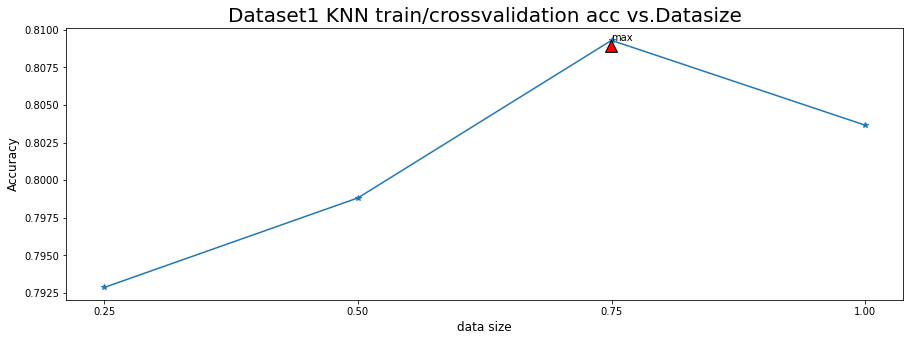

In [ ]:
# Plot for training accuracy vs dataset
knn_adult_crossvali_acc = [knn_adult25_train_acc, knn_adult50_train_acc, knn_adult75_train_acc, knn_adult100_train_acc]
dataset_size = [0.25, 0.50, 0.75, 1.00]

plot_knn_train_acc_on_datasize(dataset_size, knn_adult_crossvali_acc, "Dataset1 KNN train/crossvalidation acc vs.Datasize")

**Best model for different size of data**

In [ ]:
# 25% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_25)
# 2. Get best cross validation parameter
k_and_metric1, acc_knn_cross_vali2 = find_best_knn_param_1(train, train_and_vali)  # return best parameters and plotting info
# 3. Use parameter to predict knn
start = time.time()
knn_acc_test_25, knn_acc_train_25 = cal_best_knn_acc_1(k_and_metric1, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
knn_acc_vali_25 = knn_cross_vali(k_and_metric1[0], k_and_metric1[1], train, train_and_vali)
knn_time_25 = end - start

print(f"The result of using 25% data, train set accuracy: {knn_acc_train_25}")
print(f"The result of using 25% data, crossvalidation accuracy: {knn_acc_vali_25}")
print(f"The result of using 25% data, test set accuracy: {knn_acc_test_25}")
print(f"The time needed to train and predict is: {knn_time_25:.4f} s")

#0: crossvalidation accuracy: 0.7024 with parameter 1 and euclidean
(1, 'euclidean')
#1: crossvalidation accuracy: 0.7080 with parameter 1 and manhattan
(1, 'manhattan')
#2: crossvalidation accuracy: 0.6985 with parameter 1 and chebyshev
#3: crossvalidation accuracy: 0.7024 with parameter 1 and minkowski
#4: crossvalidation accuracy: 0.7736 with parameter 2 and euclidean
(2, 'euclidean')
#5: crossvalidation accuracy: 0.7752 with parameter 2 and manhattan
(2, 'manhattan')
#6: crossvalidation accuracy: 0.7715 with parameter 2 and chebyshev
#7: crossvalidation accuracy: 0.7736 with parameter 2 and minkowski
#8: crossvalidation accuracy: 0.7427 with parameter 3 and euclidean
#9: crossvalidation accuracy: 0.7435 with parameter 3 and manhattan
#10: crossvalidation accuracy: 0.7400 with parameter 3 and chebyshev
#11: crossvalidation accuracy: 0.7427 with parameter 3 and minkowski
#12: crossvalidation accuracy: 0.7766 with parameter 4 and euclidean
(4, 'euclidean')
#13: crossvalidation accurac

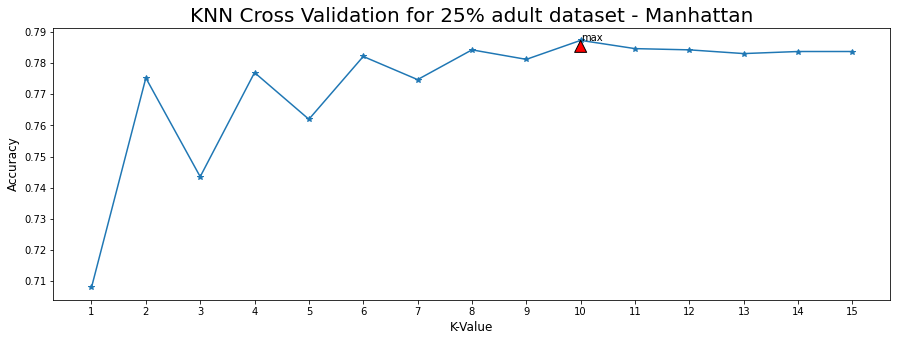

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali2,'manhattan'), "KNN Cross Validation for 25% adult dataset - Manhattan")

In [ ]:
# 50% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_50)
# 2. Get best cross validation parameter
k_and_metric1, acc_knn_cross_vali3 = find_best_knn_param_1(train, train_and_vali)  # return best parameters and plotting info
# 3. Use parameter to predict knn
start = time.time()
knn_acc_test_50,  knn_acc_train_50= cal_best_knn_acc_1(k_and_metric1, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
knn_acc_vali_50 = knn_cross_vali(k_and_metric1[0], k_and_metric1[1], train, train_and_vali)
knn_time_50 = end - start

print(f"The result of using 50% data, train set accuracy= {knn_acc_train_50}")
print(f"The result of using 50% data, crossvalidation  accuracy= {knn_acc_vali_50}")
print(f"The result of using 50% data, test set accuracy= {knn_acc_test_50}")
print(f"The time needed to train and predict is: {knn_time_50:.4f} s")

#0: crossvalidation accuracy: 0.7067 with parameter 1 and euclidean
(1, 'euclidean')
#1: crossvalidation accuracy: 0.7104 with parameter 1 and manhattan
(1, 'manhattan')
#2: crossvalidation accuracy: 0.7026 with parameter 1 and chebyshev
#3: crossvalidation accuracy: 0.7067 with parameter 1 and minkowski
#4: crossvalidation accuracy: 0.7755 with parameter 2 and euclidean
(2, 'euclidean')
#5: crossvalidation accuracy: 0.7785 with parameter 2 and manhattan
(2, 'manhattan')
#6: crossvalidation accuracy: 0.7742 with parameter 2 and chebyshev
#7: crossvalidation accuracy: 0.7755 with parameter 2 and minkowski
#8: crossvalidation accuracy: 0.7514 with parameter 3 and euclidean
#9: crossvalidation accuracy: 0.7557 with parameter 3 and manhattan
#10: crossvalidation accuracy: 0.7470 with parameter 3 and chebyshev
#11: crossvalidation accuracy: 0.7514 with parameter 3 and minkowski
#12: crossvalidation accuracy: 0.7841 with parameter 4 and euclidean
(4, 'euclidean')
#13: crossvalidation accurac

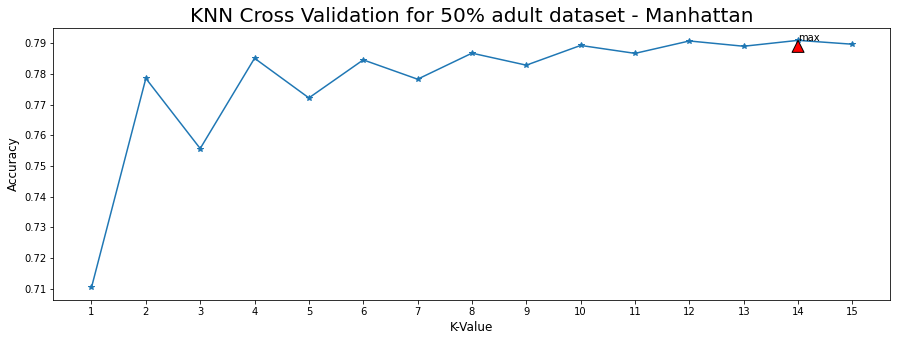

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali3,'manhattan'), "KNN Cross Validation for 50% adult dataset - Manhattan")

In [ ]:
# 75% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_75)
# 2. Get best cross validation parameter
k_and_metric1, acc_knn_cross_vali4 = find_best_knn_param_1(train, train_and_vali)  # return best parameters and plotting info
# 3. Use parameter to predict knn
start = time.time()
knn_acc_test_75,  knn_acc_train_75= cal_best_knn_acc_1(k_and_metric1, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
knn_acc_vali_75 = knn_cross_vali(k_and_metric1[0], k_and_metric1[1], train, train_and_vali)
knn_time_75 = end - start

print(f"The result of using 75% data, train set accuracy= {knn_acc_train_75}")
print(f"The result of using 75% data, crossvalidation accuracy= {knn_acc_vali_75}")
print(f"The result of using 75% data, test set accuracy= {knn_acc_test_75}")
print(f"The time needed to train and predict is: {knn_time_75:.4f} s")

#0: crossvalidation accuracy: 0.8649 with parameter 1 and euclidean
(1, 'euclidean')
#1: crossvalidation accuracy: 0.8688 with parameter 1 and manhattan
(1, 'manhattan')
#2: crossvalidation accuracy: 0.8633 with parameter 1 and chebyshev
#3: crossvalidation accuracy: 0.8649 with parameter 1 and minkowski
#4: crossvalidation accuracy: 0.8106 with parameter 2 and euclidean
#5: crossvalidation accuracy: 0.8148 with parameter 2 and manhattan
#6: crossvalidation accuracy: 0.8084 with parameter 2 and chebyshev
#7: crossvalidation accuracy: 0.8106 with parameter 2 and minkowski
#8: crossvalidation accuracy: 0.7632 with parameter 3 and euclidean
#9: crossvalidation accuracy: 0.7685 with parameter 3 and manhattan
#10: crossvalidation accuracy: 0.7628 with parameter 3 and chebyshev
#11: crossvalidation accuracy: 0.7632 with parameter 3 and minkowski
#12: crossvalidation accuracy: 0.7961 with parameter 4 and euclidean
#13: crossvalidation accuracy: 0.7998 with parameter 4 and manhattan
#14: cross

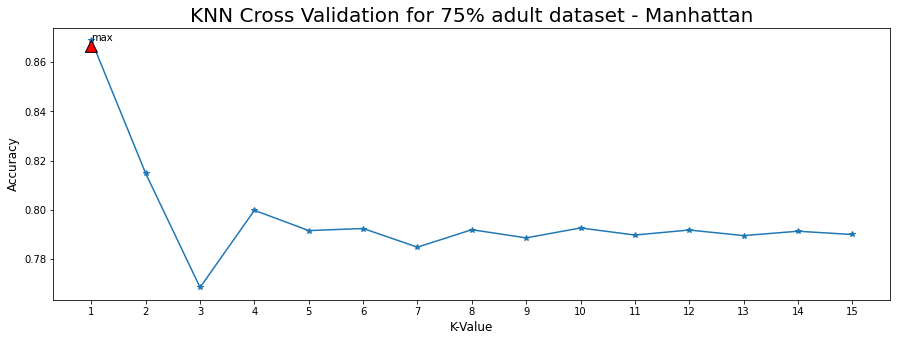

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali4,'manhattan'), "KNN Cross Validation for 75% adult dataset - Manhattan")



---



### Tree

In [ ]:
# Set up of train and test features and label

train_adult_x = adult_train_encode[:, :-1]
train_adult_y = adult_train_encode[:, -1]
test_adult_x = adult_test_encode[:, :-1]
test_adult_y = adult_test_encode[:, -1]

In [ ]:
# Given tree_depth and train/vali set, calculate the average accuracy

def decision_tree_cross_validation(tree_depth, train_set, vali_set):
    accuracy = 0
    for i in range(5):
        X_train = train_set[i][:, :-1]
        y_train = train_set[i][:, -1]
        X_test = vali_set[i][:, :-1]
        y_test = vali_set[i][:, -1]
        dt_model = DecisionTreeClassifier(random_state = 1, max_depth=tree_depth)
        dt_model.fit(X_train, y_train) 
        y_pred = dt_model.predict(X_test)
        #score(X, y[, sample_weight])
        dt_acc_test = np.mean(y_pred == y_test)
        accuracy += dt_acc_test
    acc = accuracy/5
    return acc

In [ ]:
# input train and validation set
# return the parameter gives max accuracy and list for plotting purpose

def find_best_tree_param_1(train, train_and_vali):
    # loop through depth of tree from 1 to 15
    tree_depths = range(1,16)
    acc_dt_cross_vali = []
    max_acc = 0
    max_param = 0
    for i in tree_depths:
        acc = decision_tree_cross_validation(i, train, train_and_vali)
        if acc > max_acc:
            max_acc = acc
            max_param = i
        acc_dt_cross_vali.append(acc)
    print(acc_dt_cross_vali)
    print(f"Final best tree depth is: {max_param}")

    return max_param, acc_dt_cross_vali


In [ ]:
# Calculate the test set accuracy using best parameters
# return accuracy

def cal_best_tree_acc_1(max_param, test_x, test_y, train_x, train_y):
    # train the model first
    tree_depth = max_param
    dt_model = DecisionTreeClassifier(random_state=1, max_depth=tree_depth)
    dt_model.fit(train_x, train_y) 
    
    # predict the value using test input
    y_pred = dt_model.predict(test_x)
    tree_acc_test = np.mean(test_y == y_pred)

    # predict the value using train input
    y_pred = dt_model.predict(train_x)
    tree_acc_train = np.mean(train_y == y_pred)

    return tree_acc_test, tree_acc_train

**Plotting functions**

In [ ]:
tree_depths = range(1, 16)

In [ ]:
# Plotting function of tree crossvalidation set
def plot_cross_validation_on_trees(depths, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ylim = plt.ylim(0.74,0.90)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=1)
    ymax = max(accuracy_scores)
    xpos = accuracy_scores.index(ymax)
    xmax = depths[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(depths)

**Tree best model with complete dataset**

In [ ]:
# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_train_encode)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali = find_best_tree_param_1(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree_acc_test_100,  tree_acc_train_100 = cal_best_tree_acc_1(tree_depth, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
tree_acc_vali_100 = decision_tree_cross_validation(tree_depth, train, train_and_vali)
tree_time_100 = end - start

print(f"The result train set accuracy: {tree_acc_train_100}")
print(f"The result crossvalidation accuracy: {tree_acc_vali_100}")
print(f"The result test set accuracy: {tree_acc_test_100}")
print(f"The time needed to train and predict is: {tree_time_100:.4f} s")

[0.751077616434104, 0.8242160546261698, 0.8402627118047906, 0.8409920008916476, 0.8416550868982753, 0.8480207829088554, 0.849744739476645, 0.8507394729078486, 0.8478883492691172, 0.8494797238090591, 0.8475235508417234, 0.8478881239390249, 0.845600550860629, 0.8420529923616396, 0.8376768291637374]
Final best tree depth is: 8
The result train set accuracy: 0.8570386579139314
The result crossvalidation accuracy: 0.8507394729078486
The result test set accuracy: 0.8508632138114209
The time needed to train and predict is: 0.3438 s


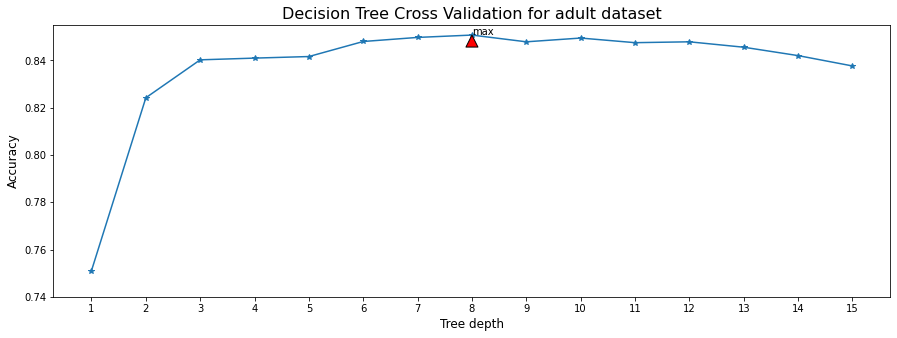

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali, "Decision Tree Cross Validation for adult dataset")



---



**Tree different size**

**Fix depth = 8, draw accuracy versus datasize** 

In [ ]:
depth = 8   # best model of complete dataset

In [ ]:
# plot function

def plot_tree_train_acc_on_datasize(x, y, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(x, y, '-*', label='train accuracy', alpha=1)

    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('data size', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(x)

In [ ]:
# 25% datasize 
adult_x = adult_25[:, :-1]
adult_y = adult_25[:, -1]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(adult_x, adult_y) 
pred_y = dt_model.predict(adult_x)
tree_adult25_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {tree_adult25_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_25)
tree_adult25_crossvali_acc = decision_tree_cross_validation(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_adult25_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.8618
CrossValidation accuracy = 0.8376


In [ ]:
# 50% datasize 
adult_x = adult_50[:, :-1]
adult_y = adult_50[:, -1]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(adult_x, adult_y) 
pred_y = dt_model.predict(adult_x)
tree_adult50_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {tree_adult50_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_50)
tree_adult50_crossvali_acc = decision_tree_cross_validation(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_adult50_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.8574
CrossValidation accuracy = 0.8454


In [ ]:
# 75% datasize 
adult_x = adult_75[:, :-1]
adult_y = adult_75[:, -1]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(adult_x, adult_y) 
pred_y = dt_model.predict(adult_x)
tree_adult75_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {tree_adult75_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_75)
tree_adult75_crossvali_acc = decision_tree_cross_validation(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_adult75_crossvali_acc:.4f}")   

Train set prediction accuracy = 0.8586
CrossValidation accuracy = 0.8508


In [ ]:
# 100% datasize 
adult_x = adult_train_encode[:, :-1]
adult_y = adult_train_encode[:, -1]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(adult_x, adult_y) 
pred_y = dt_model.predict(adult_x)
tree_adult100_train_acc = np.mean(pred_y == adult_y)
print(f"Train set prediction accuracy = {tree_adult100_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(adult_train_encode)
tree_adult100_crossvali_acc = decision_tree_cross_validation(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_adult100_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.8570
CrossValidation accuracy = 0.8507


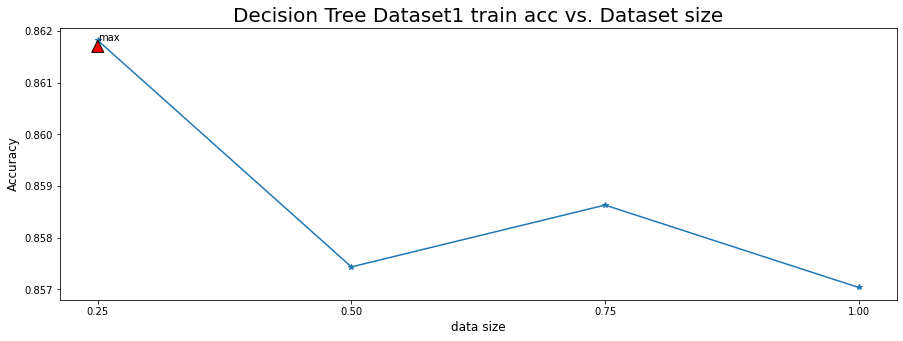

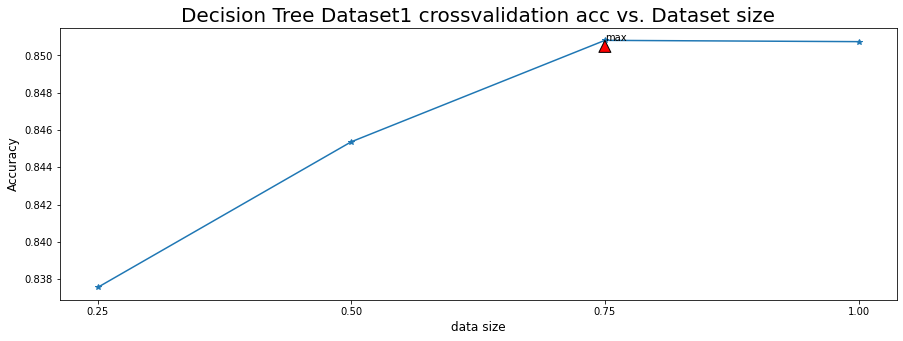

In [ ]:
# Plot for training accuracy vs dataset
tree_adult_crossvali_acc = [tree_adult25_crossvali_acc, tree_adult50_crossvali_acc, tree_adult75_crossvali_acc, tree_adult100_crossvali_acc]
tree_adult_train_acc = [tree_adult25_train_acc, tree_adult50_train_acc, tree_adult75_train_acc, tree_adult100_train_acc]
dataset_size = [0.25, 0.50, 0.75, 1.00]

plot_tree_train_acc_on_datasize(dataset_size, tree_adult_train_acc, "Decision Tree Dataset1 train acc vs. Dataset size")
plot_tree_train_acc_on_datasize(dataset_size, tree_adult_crossvali_acc, "Decision Tree Dataset1 crossvalidation acc vs. Dataset size")

**Tree different size best model**

In [ ]:
# 25% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_25)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali2 = find_best_tree_param_1(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree_acc_test_25,  tree_acc_train_25 = cal_best_tree_acc_1(tree_depth, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
tree_acc_vali_25 = decision_tree_cross_validation(tree_depth, train, train_and_vali)
tree_time_25 = end - start

print(f"The result of using 25% data, train set accuracy= {tree_acc_train_25}")
print(f"The result of using 25% data, crossvalidation accuracy= {tree_acc_vali_25}")
print(f"The result of using 25% data, test set accuracy= {tree_acc_test_25}")
print(f"The time needed to train and predict is: {tree_time_25:.4f} s")

[0.7526875001098625, 0.8217757996670727, 0.8368925263626025, 0.8371581299119517, 0.8382188741995419, 0.8417985455964478, 0.8402076488900374, 0.8375560078960366, 0.8363618466038428, 0.8387495539583014, 0.8356995076402768, 0.830394731522448, 0.8253557347339482, 0.824825406535148, 0.822039733306615]
Final best tree depth is: 6
The result of using 25% data, train set accuracy= 0.8510045752934156
The result of using 25% data, crossvalidation accuracy= 0.8417985455964478
The result of using 25% data, test set accuracy= 0.849933598937583
The time needed to train and predict is: 0.3542 s


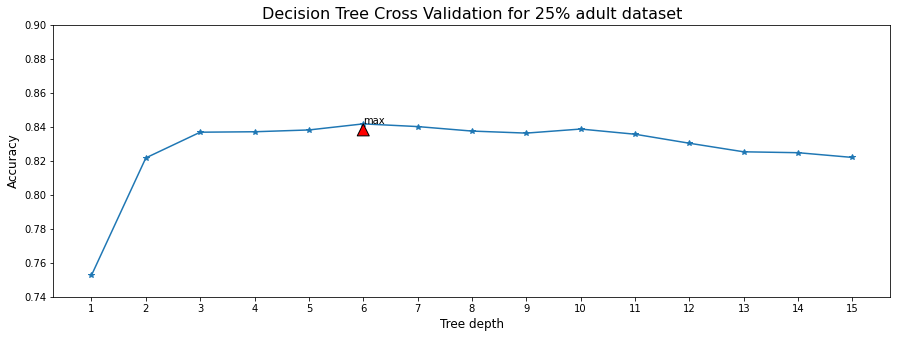

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali2, "Decision Tree Cross Validation for 25% adult dataset")

In [ ]:
# 50% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_50)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali3 = find_best_tree_param_1(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree_acc_test_50,  tree_acc_train_50 = cal_best_tree_acc_1(tree_depth, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
tree_acc_vali_50 = decision_tree_cross_validation(tree_depth, train, train_and_vali)
tree_time_50 = end - start

print(f"The result of using 50% data, train set accuracy= {tree_acc_train_50}")
print(f"The result of using 50% data, crossvalidation accuracy= {tree_acc_vali_50}")
print(f"The result of using 50% data, test set accuracy= {tree_acc_test_25}")
print(f"The time needed to train and predict is: {tree_time_50:.4f} s")

[0.7528012131080376, 0.8210329134023029, 0.8357534756626684, 0.8385383358141179, 0.8416547389725244, 0.8431135809546081, 0.8441746328717287, 0.8453680909857404, 0.8458983092273755, 0.8446386699946984, 0.8408586972672099, 0.8407261591916363, 0.8376099098916925, 0.8348249178615607, 0.833764393459169]
Final best tree depth is: 9
The result of using 50% data, train set accuracy= 0.8607187852264438
The result of using 50% data, crossvalidation accuracy= 0.8458983092273755
The result of using 50% data, test set accuracy= 0.849933598937583
The time needed to train and predict is: 0.4117 s


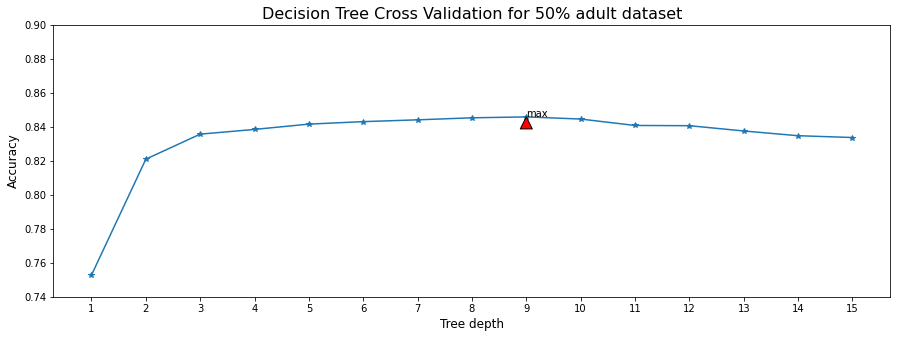

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali3, "Decision Tree Cross Validation for 50% adult dataset")

In [ ]:
# 75% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_75)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali4 = find_best_tree_param_1(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree_acc_test_75,  tree_acc_train_75 = cal_best_tree_acc_1(tree_depth, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
tree_acc_vali_75 = decision_tree_cross_validation(tree_depth, train, train_and_vali)
tree_time_75 = end - start

print(f"The result of using 75% data, train set accuracy= {tree_acc_train_75}")
print(f"The result of using 75% data, crossvalidation accuracy= {tree_acc_vali_75}")
print(f"The result of using 75% data, test set accuracy= {tree_acc_test_75}")
print(f"The time needed to train and predict is: {tree_time_75:.4f} s")

[0.7527627240353474, 0.8208378641108685, 0.83516028938357, 0.8363981124609816, 0.8409069566364289, 0.8470071662001553, 0.8489962727943297, 0.8508086815071003, 0.854168207863769, 0.8560691120653019, 0.8585000415219504, 0.8618599098240936, 0.8630531627513909, 0.8647771541343652, 0.8676065477673403]
Final best tree depth is: 15
The result of using 75% data, train set accuracy= 0.8996087792586699
The result of using 75% data, crossvalidation accuracy= 0.8676065477673403
The result of using 75% data, test set accuracy= 0.8400398406374502
The time needed to train and predict is: 0.7919 s


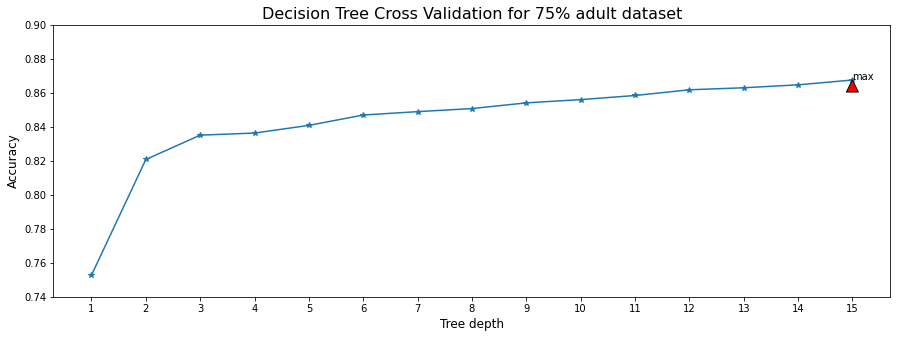

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali4, "Decision Tree Cross Validation for 75% adult dataset")

## Dataset2(internet firewall action)

### KNN

#### Set up global variables

In [ ]:
# Split data2 into test/vali and test set
# where train_data_log2 is our given set, and test_data_log2 is our target set

np.random.seed(0)                     # for repeatability 
np_data_log2 = data_log2.to_numpy()
shuffle_data_log2 = np.random.permutation(np_data_log2)
split_6_log2 = np.split(shuffle_data_log2, 6, axis = 0)

# set train set and test set
test_data_log2 = split_6_log2[5]      # test set set as last index of splitted dataset2
train_data_log2 = np.concatenate((split_6_log2[0], split_6_log2[1], split_6_log2[2], split_6_log2[3], split_6_log2[4]), axis = 0) # train set is the rest

train_and_vali_log2 = split_6_log2[0:5]
train_log2 = []
for i in range(5):
    train_log2.append(np.concatenate((train_and_vali_log2[(i+1)%5],train_and_vali_log2[(i+2)%5],train_and_vali_log2[(i+3)%5],train_and_vali_log2[(i+4)%5])))

In [ ]:
# set up features and label matrix of train and test set

train_log2_x = np.delete(train_data_log2, 4, axis=1)  # train features matrix
train_log2_y = train_data_log2[:, 4]                  # train label array
test_log2_x = np.delete(test_data_log2, 4, axis=1)    # test features matrix
test_log2_y = test_data_log2[:, 4]                    # test label array

#### Helper functions:

In [ ]:
# Given hyperparameter
# return the avg accuracy of five fold validation 

def knn_cross_vali_2(k, metric, train, train_and_vali):
    accuracy = 0
    for i in range(5):
        feature_train = np.delete(train[i], 4, axis=1)
        label_train = train[i][:, 4]
        feature_vali = np.delete(train_and_vali[i], 4, axis=1)
        label_vali = train_and_vali[i][:, 4]

        knn_model = neighbors.KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(feature_train, label_train)
        label_pred_vali = knn_model.predict(feature_vali)
        knn_acc_vali = np.mean(label_pred_vali == label_vali)
        # print(f'{knn_acc_vali:.4f}')       
        accuracy += knn_acc_vali
    accuracy = accuracy/5
    return accuracy

In [ ]:
# Find best knn parameter of dataset2(internet firewall)

import itertools
def find_best_knn_param_2(train, train_and_vali):
    # Permutate the hyperparameters, then feed into model and train
    acc_knn_cross_vali = []                                      # list to record [acc, k, metric] for later plotting
    k_pool = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
    metric_pool = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  
    knn_parameter = list(itertools.product(k_pool, metric_pool)) # cartesian product of k X metric
    max_acc = 0     # max of the accuracy
    max_param = []  # hyperparameters corresponding to the max_accuracy

    # then calculate the average accuracy returned by 5-fold cross-validation:
    cnt = 0
    for i, j in knn_parameter:
        acc = knn_cross_vali_2(i, j, train, train_and_vali)
        print(f"#{cnt}: accuracy: {acc:.4f} with parameter {i} and {j}")
        if acc > max_acc:
            max_acc = acc
            max_param = (i, j)
            print(f"Max parameter updated: {max_param}")
        acc_knn_cross_vali.append([acc, i, j])  # accuracy returned as a list
        cnt += 1
    
    print(f"\nFinal max_param is: {max_param}")
    return max_param, acc_knn_cross_vali

In [ ]:
# Calculate the test set accuracy using best parameters
# input: test set and train set
# return: accuracy

def cal_best_knn_acc_2(max_param, test_x, test_y, train_x, train_y):
    # train the model first
    k = max_param[0]
    metric = max_param[1]
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
    knn_model.fit(train_x, train_y)
    
    # predict the value using input
    y_pred = knn_model.predict(test_x)
    knn_acc_test = np.mean(test_y == y_pred)

    # predict the value using input
    y_pred = knn_model.predict(train_x)
    knn_acc_train = np.mean(train_y == y_pred)

    return knn_acc_test, knn_acc_train

**Plotting function**

In [ ]:
def get_accuracy_list(acc_result,distance_func):
  KNN_accuracy_list=[]
  for i in acc_result:
    if (i[2] == distance_func):
      KNN_accuracy_list.append(float(i[0]))
    else:
      continue
  return KNN_accuracy_list

In [ ]:
def plot_cross_validation_on_KNN(K, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(K, accuracy_scores, '-*', label='train accuracy', alpha=1)
    ymax = max(accuracy_scores)
    xpos = accuracy_scores.index(ymax)
    xmax = K[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('K-Value', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(K)

#### KNN Calculation

In [ ]:
# 1. Split Dataset2 into train and validation set:
# already done in set up phase

# 2. Get best cross validation parameter
k_and_metric2, acc_knn_cross_vali_log2_1 = find_best_knn_param_2(train_log2, train_and_vali_log2)  # return best parameters and plotting info

# 3. Use parameter to predict knn
start = time.time()
knn2_acc_test_100, knn2_acc_train_100 = cal_best_knn_acc_2(k_and_metric2, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
knn2_acc_vali_100 = knn_cross_vali_2(k_and_metric2[0], k_and_metric2[1], train_log2, train_and_vali_log2)
knn2_time_100 = end - start

print(f"The result of train set accuracy= {knn2_acc_train_100}")
print(f"The result of crossvalidation accuracy= {knn2_acc_vali_100}")
print(f"The result of test set accuracy= {knn2_acc_test_100}")
print(f"The time needed to train and predict is: {knn2_time_100:.4f} s")

#0: accuracy: 0.9934 with parameter 1 and euclidean
Max parameter updated: (1, 'euclidean')
#1: accuracy: 0.9949 with parameter 1 and manhattan
Max parameter updated: (1, 'manhattan')
#2: accuracy: 0.9928 with parameter 1 and chebyshev
#3: accuracy: 0.9934 with parameter 1 and minkowski
#4: accuracy: 0.9923 with parameter 2 and euclidean
#5: accuracy: 0.9943 with parameter 2 and manhattan
#6: accuracy: 0.9916 with parameter 2 and chebyshev
#7: accuracy: 0.9923 with parameter 2 and minkowski
#8: accuracy: 0.9938 with parameter 3 and euclidean
#9: accuracy: 0.9952 with parameter 3 and manhattan
Max parameter updated: (3, 'manhattan')
#10: accuracy: 0.9937 with parameter 3 and chebyshev
#11: accuracy: 0.9938 with parameter 3 and minkowski
#12: accuracy: 0.9935 with parameter 4 and euclidean
#13: accuracy: 0.9947 with parameter 4 and manhattan
#14: accuracy: 0.9931 with parameter 4 and chebyshev
#15: accuracy: 0.9935 with parameter 4 and minkowski
#16: accuracy: 0.9936 with parameter 5 and

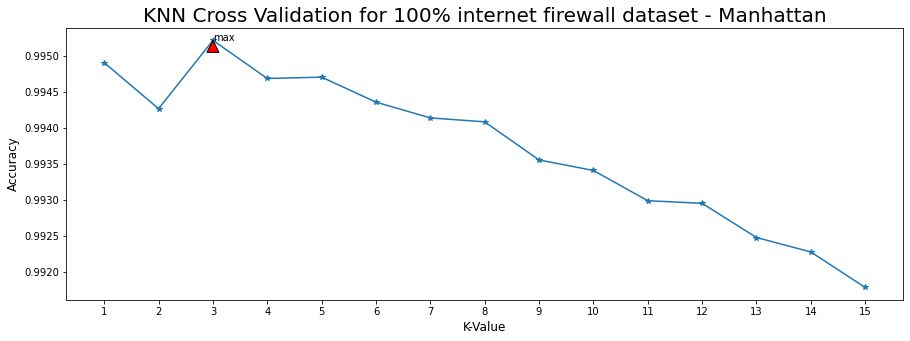

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali_log2_1,'manhattan'), "KNN Cross Validation for 100% internet firewall dataset - Manhattan")



---



**KNN different size**

In [ ]:
# split the log2 train set into different percentage

log2_25 = np.array_split(train_data_log2, 4, axis=0)[0]   # split 1/4 of the dataset
log2_50 = np.array_split(train_data_log2, 2, axis=0)[0]
log2_75 = np.concatenate((log2_25, log2_50), axis=0)   

**Fix parameter to be k=3 and metric='manhattan'（best completer train set model）, investigate how knn perform with size of data**

In [ ]:
def plot_knn_train_acc_on_datasize_2(x, y, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(x, y, '-*', label='train accuracy', alpha=1)

    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('data size', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(x)

In [ ]:
k = 3
metric = 'manhattan'

In [ ]:
# 25% datasize 
log2_x = np.delete(log2_25, 4, axis=1)
log2_y = log2_25[:, 4]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(log2_x, log2_y)
pred_y = knn_model.predict(log2_x)
knn_log2_25_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {knn_log2_25_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(log2_25)
knn_log2_25_crossvali_acc = knn_cross_vali_2(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_log2_25_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.9947
CrossValidation accuracy = 0.9906


In [ ]:
# 50% datasize 
log2_x = np.delete(log2_50, 4, axis=1)
log2_y = log2_50[:, 4]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(log2_x, log2_y)
pred_y = knn_model.predict(log2_x)
knn_log2_50_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {knn_log2_50_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(log2_50)
knn_log2_50_crossvali_acc = knn_cross_vali_2(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_log2_50_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.9962
CrossValidation accuracy = 0.9932


In [ ]:
# 75% datasize 
log2_x = np.delete(log2_75, 4, axis=1)
log2_y = log2_75[:, 4]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(log2_x, log2_y)
pred_y = knn_model.predict(log2_x)
knn_log2_75_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {knn_log2_75_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(log2_75)
knn_log2_75_crossvali_acc = knn_cross_vali_2(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_log2_75_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.9981
CrossValidation accuracy = 0.9944


In [ ]:
# 100% datasize 
log2_x = np.delete(train_data_log2, 4, axis=1)
log2_y = train_data_log2[:, 4]

# calculate train set accuracy:
knn_model = neighbors.KNeighborsClassifier(n_neighbors = k, metric = metric)
knn_model.fit(log2_x, log2_y)
pred_y = knn_model.predict(log2_x)
knn_log2_100_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {knn_log2_100_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(train_data_log2)
knn_log2_100_crossvali_acc = knn_cross_vali_2(k, metric, train, train_and_vali)
print(f"CrossValidation accuracy = {knn_log2_100_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.9970
CrossValidation accuracy = 0.9948


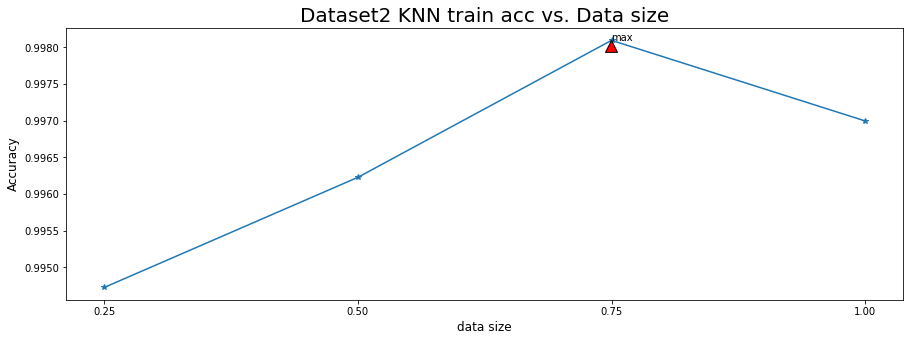

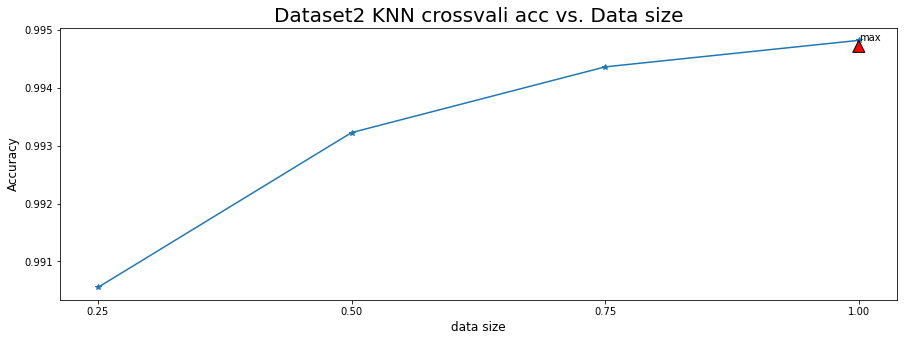

In [ ]:
# Plot for training accuracy vs dataset
knn_log2_train_acc = [knn_log2_25_train_acc, knn_log2_50_train_acc, knn_log2_75_train_acc, knn_log2_100_train_acc]
knn_log2_crossvali_acc = [knn_log2_25_crossvali_acc, knn_log2_50_crossvali_acc, knn_log2_75_crossvali_acc, knn_log2_100_crossvali_acc]
dataset_size = [0.25, 0.50, 0.75, 1.00]

plot_knn_train_acc_on_datasize_2(dataset_size, knn_log2_train_acc, "Dataset2 KNN train acc vs. Data size")
plot_knn_train_acc_on_datasize_2(dataset_size, knn_log2_crossvali_acc, "Dataset2 KNN crossvali acc vs. Data size")

**Best model for KNN with different data size**



In [ ]:
# 25% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(log2_25)
# 2. Get best cross validation parameter
k_and_metric2, acc_knn_cross_vali_log2_2 = find_best_knn_param_2(train, train_and_vali)  # return best parameters and plotting info
# 3. Use parameter to predict knn
start = time.time()
knn2_acc_test_25, knn2_acc_train_25 = cal_best_knn_acc_2(k_and_metric2, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
knn2_acc_vali_25 = knn_cross_vali_2(k_and_metric2[0], k_and_metric2[1], train, train_and_vali)
knn2_time_25 = end - start

print(f"The result of using 25% data, train set accuracy= {knn2_acc_train_25}")
print(f"The result of using 25% data, crossvalidation accuracy= {knn2_acc_vali_25}")
print(f"The result of using 25% data, test set accuracy= {knn2_acc_test_25}")
print(f"The time needed to train and predict is: {knn2_time_25:.4f} s")

#0: accuracy: 0.9897 with parameter 1 and euclidean
Max parameter updated: (1, 'euclidean')
#1: accuracy: 0.9911 with parameter 1 and manhattan
Max parameter updated: (1, 'manhattan')
#2: accuracy: 0.9897 with parameter 1 and chebyshev
#3: accuracy: 0.9897 with parameter 1 and minkowski
#4: accuracy: 0.9877 with parameter 2 and euclidean
#5: accuracy: 0.9893 with parameter 2 and manhattan
#6: accuracy: 0.9881 with parameter 2 and chebyshev
#7: accuracy: 0.9877 with parameter 2 and minkowski
#8: accuracy: 0.9902 with parameter 3 and euclidean
#9: accuracy: 0.9906 with parameter 3 and manhattan
#10: accuracy: 0.9911 with parameter 3 and chebyshev
#11: accuracy: 0.9902 with parameter 3 and minkowski
#12: accuracy: 0.9897 with parameter 4 and euclidean
#13: accuracy: 0.9906 with parameter 4 and manhattan
#14: accuracy: 0.9901 with parameter 4 and chebyshev
#15: accuracy: 0.9897 with parameter 4 and minkowski
#16: accuracy: 0.9891 with parameter 5 and euclidean
#17: accuracy: 0.9898 with pa

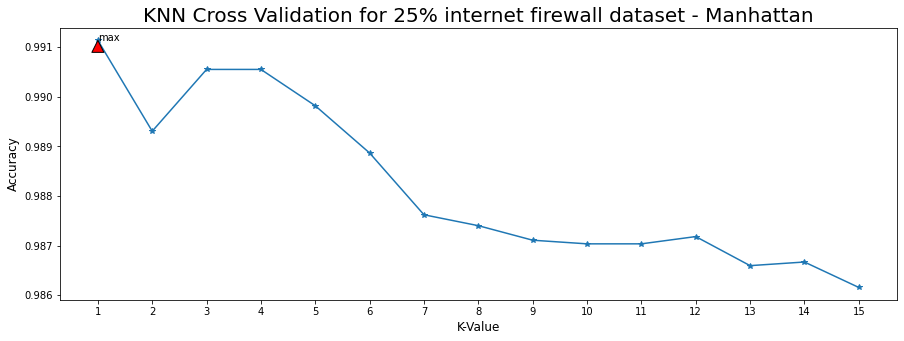

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali_log2_2,'manhattan'), "KNN Cross Validation for 25% internet firewall dataset - Manhattan")

In [ ]:
# 50% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(log2_50)
# 2. Get best cross validation parameter
k_and_metric2, acc_knn_cross_vali_log2_3 = find_best_knn_param_2(train, train_and_vali)  # return best parameters and plotting info
# 3. Use parameter to predict knn
start = time.time()
knn2_acc_test_50, knn2_acc_train_50 = cal_best_knn_acc_2(k_and_metric2, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
knn2_acc_vali_50 = knn_cross_vali_2(k_and_metric2[0], k_and_metric2[1], train, train_and_vali)
knn2_time_50 = end - start

print(f"The result of using 50% data, train set accuracy= {knn2_acc_train_50}")
print(f"The result of using 50% data, crossvalidation accuracy= {knn2_acc_vali_50}")
print(f"The result of using 50% data, test set accuracy= {knn2_acc_test_50}")
print(f"The time needed to train and predict is: {knn2_time_50:.4f} s")

#0: accuracy: 0.9919 with parameter 1 and euclidean
Max parameter updated: (1, 'euclidean')
#1: accuracy: 0.9932 with parameter 1 and manhattan
Max parameter updated: (1, 'manhattan')
#2: accuracy: 0.9915 with parameter 1 and chebyshev
#3: accuracy: 0.9919 with parameter 1 and minkowski
#4: accuracy: 0.9907 with parameter 2 and euclidean
#5: accuracy: 0.9920 with parameter 2 and manhattan
#6: accuracy: 0.9903 with parameter 2 and chebyshev
#7: accuracy: 0.9907 with parameter 2 and minkowski
#8: accuracy: 0.9925 with parameter 3 and euclidean
#9: accuracy: 0.9932 with parameter 3 and manhattan
#10: accuracy: 0.9923 with parameter 3 and chebyshev
#11: accuracy: 0.9925 with parameter 3 and minkowski
#12: accuracy: 0.9919 with parameter 4 and euclidean
#13: accuracy: 0.9928 with parameter 4 and manhattan
#14: accuracy: 0.9916 with parameter 4 and chebyshev
#15: accuracy: 0.9919 with parameter 4 and minkowski
#16: accuracy: 0.9916 with parameter 5 and euclidean
#17: accuracy: 0.9927 with pa

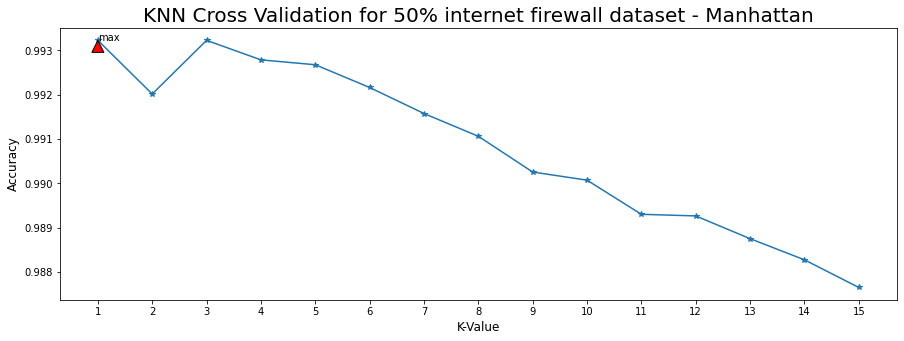

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali_log2_3,'manhattan'), "KNN Cross Validation for 50% internet firewall dataset - Manhattan")

In [ ]:
# 75% of data results into:

# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(log2_75)
# 2. Get best cross validation parameter
k_and_metric2, acc_knn_cross_vali_log2_4 = find_best_knn_param_2(train, train_and_vali)  # return best parameters and plotting info
# 3. Use parameter to predict knn
start = time.time()
knn2_acc_test_75, knn2_acc_train_75 = cal_best_knn_acc_2(k_and_metric2, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
knn2_acc_vali_75 = knn_cross_vali_2(k_and_metric2[0], k_and_metric2[1], train, train_and_vali)
knn2_time_75 = end - start

print(f"The result of using 75% data, train set accuracy= {knn2_acc_train_75}")
print(f"The result of using 75% data, crossvalidation accuracy= {knn2_acc_vali_75}")
print(f"The result of using 75% data, test set accuracy= {knn2_acc_test_75}")
print(f"The time needed to train and predict is: {knn2_time_75:.4f} s")

#0: accuracy: 0.9962 with parameter 1 and euclidean
Max parameter updated: (1, 'euclidean')
#1: accuracy: 0.9969 with parameter 1 and manhattan
Max parameter updated: (1, 'manhattan')
#2: accuracy: 0.9960 with parameter 1 and chebyshev
#3: accuracy: 0.9962 with parameter 1 and minkowski
#4: accuracy: 0.9942 with parameter 2 and euclidean
#5: accuracy: 0.9953 with parameter 2 and manhattan
#6: accuracy: 0.9936 with parameter 2 and chebyshev
#7: accuracy: 0.9942 with parameter 2 and minkowski
#8: accuracy: 0.9936 with parameter 3 and euclidean
#9: accuracy: 0.9944 with parameter 3 and manhattan
#10: accuracy: 0.9934 with parameter 3 and chebyshev
#11: accuracy: 0.9936 with parameter 3 and minkowski
#12: accuracy: 0.9929 with parameter 4 and euclidean
#13: accuracy: 0.9942 with parameter 4 and manhattan
#14: accuracy: 0.9928 with parameter 4 and chebyshev
#15: accuracy: 0.9929 with parameter 4 and minkowski
#16: accuracy: 0.9934 with parameter 5 and euclidean
#17: accuracy: 0.9941 with pa

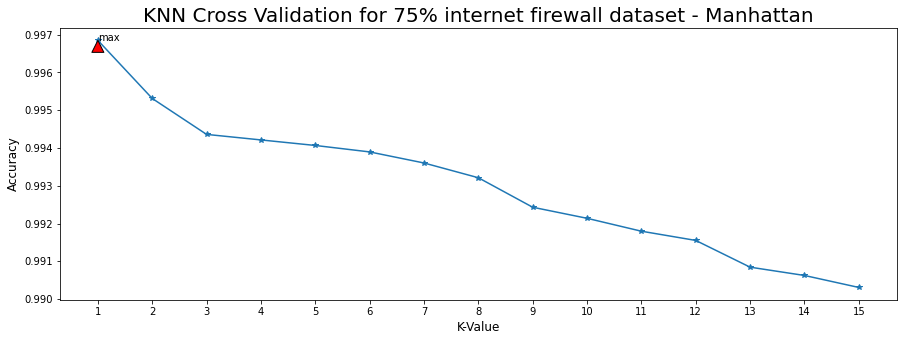

In [ ]:
plot_cross_validation_on_KNN(k_pool, get_accuracy_list(acc_knn_cross_vali_log2_4,'manhattan'), "KNN Cross Validation for 75% internet firewall dataset - Manhattan")



---



### Tree

#### Helper functions

In [ ]:
# Given tree_depth and train/vali set, calculate the average accuracy

def decision_tree_cross_validation_2(tree_depth, train_set, vali_set):
    accuracy = 0
    for i in range(5):
        X_train = np.delete(train_set[i], 4, axis=1)
        y_train = train_set[i][:, 4]
        X_test = np.delete(vali_set[i], 4, axis=1)
        y_test = vali_set[i][:, 4]

        dt_model = DecisionTreeClassifier(random_state=1, max_depth=tree_depth)
        dt_model.fit(X_train, y_train) 
        y_pred = dt_model.predict(X_test)
        dt_acc_test = np.mean(y_pred == y_test)
        accuracy += dt_acc_test
    acc = accuracy/5
    return acc

In [ ]:
# input train and validation set
# return the parameter gives max accuracy

def find_best_tree_param_2(train, train_and_vali):
    # loop through depth of tree from 1 to 15
    tree_depths = range(1,16)
    acc_dt_cross_vali = []
    max_acc = 0
    max_param = 0
    for i in tree_depths:
        acc = decision_tree_cross_validation_2(i, train, train_and_vali)
        if acc > max_acc:
            max_acc = acc
            max_param = i
        acc_dt_cross_vali.append(acc)
    print(acc_dt_cross_vali)
    print(f"Final best tree depth is: {max_param}")

    return max_param, acc_dt_cross_vali


In [ ]:
# Calculate the test set accuracy using best parameters
# return accuracy

def cal_best_tree_acc_2(max_param, test_x, test_y, train_x, train_y):
    # train the model first
    tree_depth = max_param
    dt_model = DecisionTreeClassifier(random_state=1, max_depth=tree_depth)
    dt_model.fit(train_x, train_y) 
    
    # predict the value using input
    y_pred = dt_model.predict(test_x)
    tree_acc_test = np.mean(test_y == y_pred)

    # predict the value using input
    y_pred = dt_model.predict(train_x)
    tree_acc_train = np.mean(train_y == y_pred)

    return tree_acc_test, tree_acc_train

**Plotting functions**

In [ ]:
tree_depths = range(1, 16)

In [ ]:
# Plotting function of tree crossvalidation set
def plot_cross_validation_on_trees(depths, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ylim = plt.ylim(0.78,1.00)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=1)
    ymax = max(accuracy_scores)
    xpos = accuracy_scores.index(ymax)
    xmax = depths[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(depths)

#### Tree Calculation

**Best model of complete dataset2**

In [ ]:
# 1. Split Dataset2 into train and validation set:
# Already splitted

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali = find_best_tree_param_2(train_log2, train_and_vali_log2)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree2_acc_test_100, tree2_acc_train_100 = cal_best_tree_acc_2(tree_depth, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
tree2_acc_vali_100 = decision_tree_cross_validation_2(tree_depth, train_log2, train_and_vali_log2)
tree2_time_100 = end - start

print(f"The result train set accuracy= {tree2_acc_train_100}")
print(f"The result crossvalidation accuracy= {tree2_acc_vali_100}")
print(f"The result test set accuracy= {tree2_acc_test_100}")
print(f"The time needed to train and predict is: {tree2_time_100:.4f} s")

[0.7976377952755905, 0.981853140450467, 0.9932246841237868, 0.9983519501922725, 0.9982420802050906, 0.9984801318439847, 0.9985533785021058, 0.9983702618568028, 0.9982420802050906, 0.9982420802050906, 0.998077275224318, 0.9980589635597876, 0.9978758469144845, 0.9978575352499544, 0.9978392235854241]
Final best tree depth is: 7
The result train set accuracy= 0.9989013001281817
The result crossvalidation accuracy= 0.9985533785021058
The result test set accuracy= 0.9980772752243179
The time needed to train and predict is: 0.2342 s


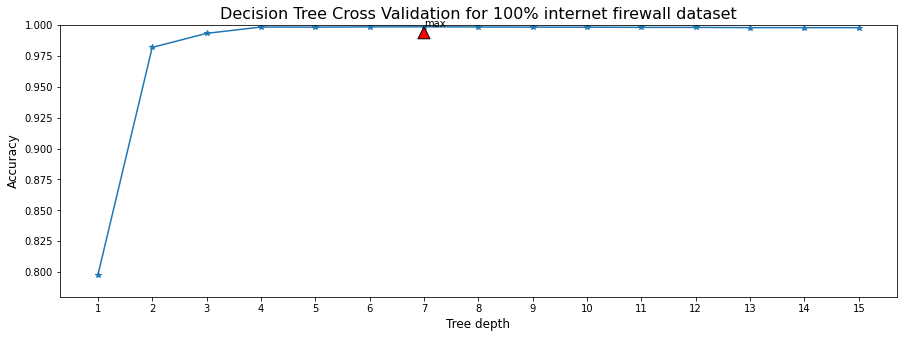

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali, "Decision Tree Cross Validation for 100% internet firewall dataset")



---




**Tree different size**

**Fix depth = 7(best model of complete dataset2), draw accuracy versus datasize** 

In [ ]:
depth = 7   # best model for complete model

In [ ]:
# plot function

def plot_tree_train_acc_on_datasize(x, y, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(x, y, '-*', label='train accuracy', alpha=1)

    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    ax.annotate('max', xy=(xmax, ymax), arrowprops=dict(facecolor='red'),)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('data size', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xticks(x)

In [ ]:
# 25% datasize 
log2_x = np.delete(log2_25, 4, axis=1)
log2_y = log2_25[:, 4]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(log2_x, log2_y) 
pred_y = dt_model.predict(log2_x)
tree_log2_25_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {tree_log2_25_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(log2_25)
tree_log2_25_crossvali_acc = decision_tree_cross_validation_2(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_log2_25_crossvali_acc:.4f}")  

Train set prediction accuracy = 0.9993
CrossValidation accuracy = 0.9977


In [ ]:
# 50% datasize 
log2_x = np.delete(log2_50, 4, axis=1)
log2_y = log2_50[:, 4]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(log2_x, log2_y) 
pred_y = dt_model.predict(log2_x)
tree_log2_50_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {tree_log2_50_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(log2_50)
tree_log2_50_crossvali_acc = decision_tree_cross_validation_2(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_log2_50_crossvali_acc:.4f}") 

Train set prediction accuracy = 0.9990
CrossValidation accuracy = 0.9981


In [ ]:
# 75% datasize 
log2_x = np.delete(log2_75, 4, axis=1)
log2_y = log2_75[:, 4]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(log2_x, log2_y) 
pred_y = dt_model.predict(log2_x)
tree_log2_75_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {tree_log2_75_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(log2_75)
tree_log2_75_crossvali_acc = decision_tree_cross_validation_2(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_log2_75_crossvali_acc:.4f}") 

Train set prediction accuracy = 0.9990
CrossValidation accuracy = 0.9986


In [ ]:
# 100% datasize 
log2_x = np.delete(train_data_log2, 4, axis=1)
log2_y = train_data_log2[:, 4]

# calculate train set accuracy:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
dt_model.fit(log2_x, log2_y) 
pred_y = dt_model.predict(log2_x)
tree_log2_100_train_acc = np.mean(pred_y == log2_y)
print(f"Train set prediction accuracy = {tree_log2_100_train_acc:.4f}")       

# calculate crossvalidation accuracy:
train, train_and_vali = split_train_vali(train_data_log2)
tree_log2_100_crossvali_acc = decision_tree_cross_validation_2(depth, train, train_and_vali)
print(f"CrossValidation accuracy = {tree_log2_100_crossvali_acc:.4f}") 

Train set prediction accuracy = 0.9989
CrossValidation accuracy = 0.9984


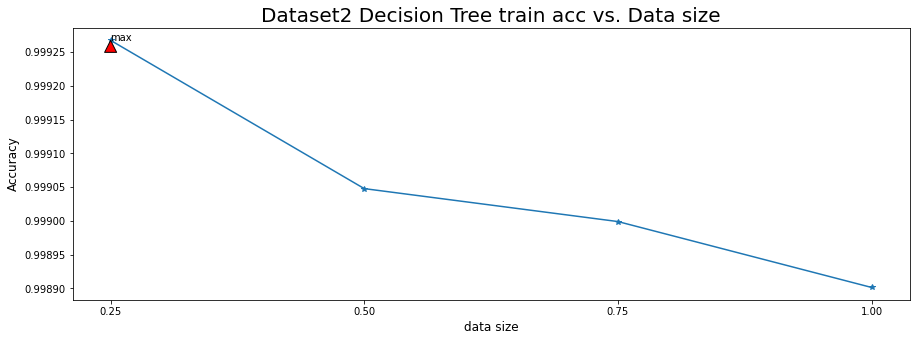

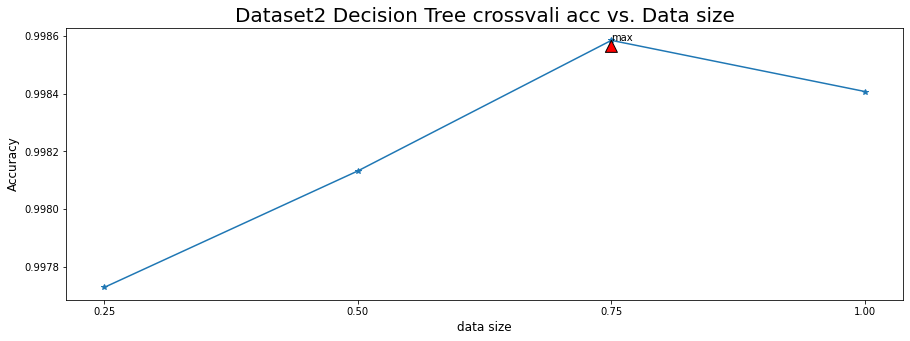

In [ ]:
# Plot for training accuracy vs dataset
tree_log2_crossvali_acc = [tree_log2_25_crossvali_acc, tree_log2_50_crossvali_acc, tree_log2_75_crossvali_acc, tree_log2_100_crossvali_acc]
tree_log2_train_acc = [tree_log2_25_train_acc, tree_log2_50_train_acc, tree_log2_75_train_acc, tree_log2_100_train_acc]
dataset_size = [0.25, 0.50, 0.75, 1.00]

plot_tree_train_acc_on_datasize(dataset_size, tree_log2_train_acc, "Dataset2 Decision Tree train acc vs. Data size")
plot_tree_train_acc_on_datasize(dataset_size, tree_log2_crossvali_acc, "Dataset2 Decision Tree crossvali acc vs. Data size")

In [ ]:
# 25% of data results into:

# 1. Split Dataset2 into train and validation set:
train, train_and_vali = split_train_vali(log2_25)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali = find_best_tree_param_2(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree2_acc_test_25, tree2_acc_train_25 = cal_best_tree_acc_2(tree_depth, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
tree2_acc_vali_25 = decision_tree_cross_validation_2(tree_depth, train, train_and_vali)
tree2_time_25 = end - start

print(f"The result of using 25% data, train set accuracy= {tree2_acc_train_25}")
print(f"The result of using 25% data, crossvalidation accuracy= {tree2_acc_vali_25}")
print(f"The result of using 25% data, test set accuracy= {tree2_acc_test_25}")
print(f"The time needed to train and predict is: {tree2_time_25:.4f} s")

[0.7970407061509223, 0.9830074722055681, 0.9932614413537152, 0.9980957477771831, 0.9978027343095084, 0.9982422142729723, 0.9977293937601518, 0.9978027074841428, 0.9978027074841428, 0.9977294474108828, 0.9976561873376226, 0.9976561873376226, 0.9976561873376226, 0.9976561873376226, 0.9976561873376226]
Final best tree depth is: 6
The result of using 25% data, train set accuracy= 0.9987181834828786
The result of using 25% data, crossvalidation accuracy= 0.9982422142729723
The result of using 25% data, test set accuracy= 0.9978026002563632
The time needed to train and predict is: 0.2488 s


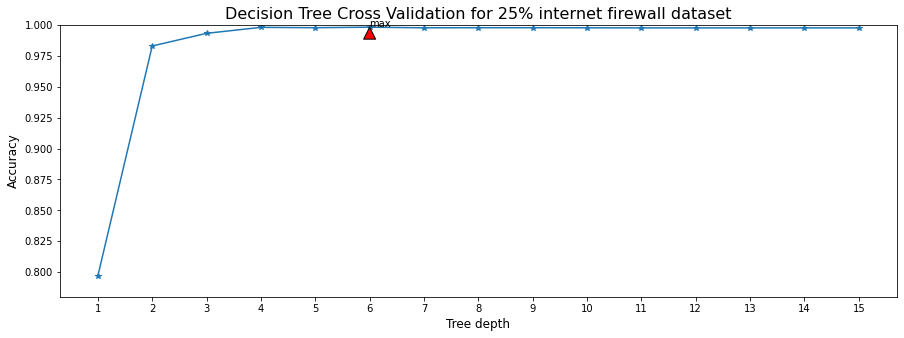

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali, "Decision Tree Cross Validation for 25% internet firewall dataset")

In [ ]:
# 50% of data results into:

# 1. Split Dataset2 into train and validation set:
train, train_and_vali = split_train_vali(log2_50)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali = find_best_tree_param_2(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree2_acc_test_50, tree2_acc_train_50 = cal_best_tree_acc_2(tree_depth, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
tree2_acc_vali_50 = decision_tree_cross_validation_2(tree_depth, train, train_and_vali)
tree2_time_50 = end - start

print(f"The result of using 50% data, train set accuracy= {tree2_acc_train_50}")
print(f"The result of using 50% data, crossvalidation accuracy= {tree2_acc_vali_50}")
print(f"The result of using 50% data, test set accuracy= {tree2_acc_test_50}")
print(f"The time needed to train and predict is: {tree2_time_50:.4f} s")

[0.7981322102179087, 0.9822743087346639, 0.9931514374656656, 0.9982420802050905, 0.9980955868888481, 0.9982420802050905, 0.9981322102179087, 0.9979857169016663, 0.9979490935726056, 0.9977293535982421, 0.9975828602819996, 0.9976561069401209, 0.9976927302691815, 0.9976194836110602, 0.9976194836110601]
Final best tree depth is: 4
The result of using 50% data, train set accuracy= 0.9984251968503937
The result of using 50% data, crossvalidation accuracy= 0.9982420802050905
The result of using 50% data, test set accuracy= 0.9976194836110602
The time needed to train and predict is: 0.2360 s


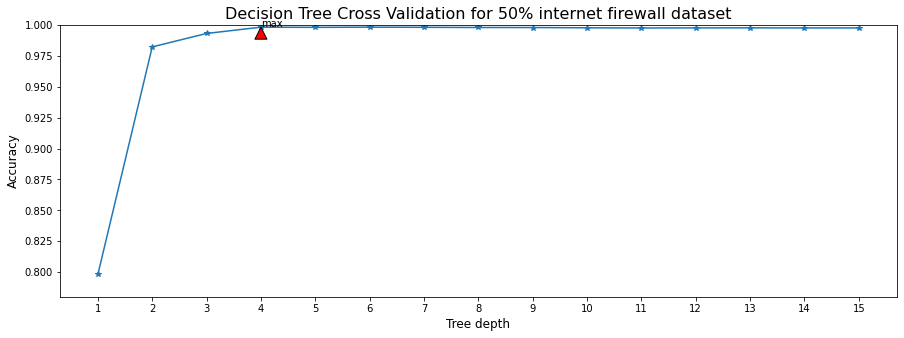

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali, "Decision Tree Cross Validation for 50% internet firewall dataset")

In [ ]:
# 75% of data results into:

# 1. Split Dataset2 into train and validation set:
train, train_and_vali = split_train_vali(log2_75)

# 2. Get best cross validation parameter
tree_depth, acc_dt_cross_vali = find_best_tree_param_2(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict tree
start = time.time()
tree2_acc_test_75, tree2_acc_train_75 = cal_best_tree_acc_2(tree_depth, test_log2_x, test_log2_y, train_log2_x, train_log2_y)
end = time.time()
tree2_acc_vali_75 = decision_tree_cross_validation_2(tree_depth, train, train_and_vali)
tree2_time_75 = end - start

print(f"The result of using 75% data, train set accuracy= {tree2_acc_train_75}")
print(f"The result of using 75% data, crossvalidation accuracy= {tree2_acc_vali_75}")
print(f"The result of using 75% data, test set accuracy= {tree2_acc_test_75}")
print(f"The time needed to train and predict is: {tree2_time_75:.4f} s")

[0.7977684485782796, 0.9825187115860778, 0.9933346271107389, 0.9983641773364058, 0.9982665181058097, 0.9985350847156941, 0.9985839188018861, 0.998486253610098, 0.998437422504502, 0.998486253610098, 0.998510667672598, 0.9985106706531941, 0.9985350847156941, 0.9985350847156941, 0.9985350847156941]
Final best tree depth is: 7
The result of using 75% data, train set accuracy= 0.9989013001281817
The result of using 75% data, crossvalidation accuracy= 0.9985839188018861
The result of using 75% data, test set accuracy= 0.9980772752243179
The time needed to train and predict is: 0.2521 s


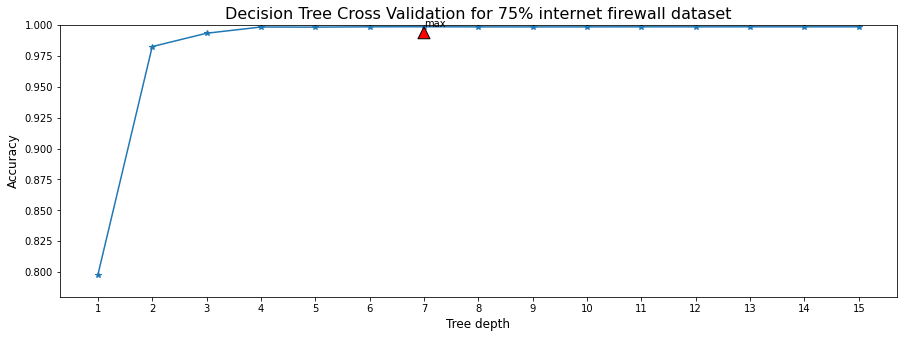

In [ ]:
# Plotting
plot_cross_validation_on_trees(tree_depths, acc_dt_cross_vali, "Decision Tree Cross Validation for 75% internet firewall dataset")

# Going beyond

##Normalizing data for KNN



**ATTENTION: FOLLOWING CODE WILL BE EXTREMELY SLOW TO COMPUTE AND MAY DESTROY SOME GLOBAL VALUES DEFINED BEFORE. AFTER RUNNING FOLLOWING CODE, IT IS BETTER TO RERUN THE CODE BY SEQUENCE FROM THE FRONT**

In [ ]:
# Normalize the features of adult.data using sklearn scaler

from sklearn import preprocessing
adult_scaler = preprocessing.StandardScaler()

adult_train_features = adult_train_encode[:, :-1]
adult_scaler.fit(adult_train_features)
adult_train_features_normal = adult_scaler.transform(adult_train_features)
adult_train_encode = np.concatenate((adult_train_features_normal, adult_train_encode[:,[-1]]), axis=1)


adult_test_features = adult_test_encode[:, :-1]
adult_scaler.fit(adult_test_features)
adult_test_features_normal = adult_scaler.transform(adult_test_features)
adult_test_encode = np.concatenate((adult_test_features_normal, adult_test_encode[:,[-1]]), axis=1)


# Set up of train and test features and label
train_adult_x = adult_train_encode[:, :-1]
train_adult_y = adult_train_encode[:, -1]
test_adult_x = adult_test_encode[:, :-1]
test_adult_y = adult_test_encode[:, -1]

In [ ]:
# 1. Split Dataset1 into train and validation set:
train, train_and_vali = split_train_vali(adult_train_encode)

# 2. Get best cross validation parameter
k_and_metric1, acc_knn_cross_vali1 = find_best_knn_param_1(train, train_and_vali)  # return best parameters and plotting info

# 3. Use parameter to predict knn
start = time.time()
knn_acc_test_100, knn_acc_train_100 = cal_best_knn_acc_1(k_and_metric1, test_adult_x, test_adult_y, train_adult_x, train_adult_y)
end = time.time()
knn_acc_vali_100 = knn_cross_vali(k_and_metric1[0], k_and_metric1[1], train, train_and_vali)
knn_time_100 = end - start

print(f"The best model result train set accuracy: {knn_acc_train_100}")
print(f"The best model result crossvalidation accuracy: {knn_acc_vali_100}")
print(f"The best model result test set accuracy: {knn_acc_test_100}")
print(f"The time needed to train and predict is: {knn_time_100:.4f} s")

#0: crossvalidation accuracy: 0.7885 with parameter 1 and euclidean
(1, 'euclidean')
#1: crossvalidation accuracy: 0.7909 with parameter 1 and manhattan
(1, 'manhattan')
#2: crossvalidation accuracy: 0.7771 with parameter 1 and chebyshev
#3: crossvalidation accuracy: 0.7885 with parameter 1 and minkowski
#4: crossvalidation accuracy: 0.8065 with parameter 2 and euclidean
(2, 'euclidean')
#5: crossvalidation accuracy: 0.8068 with parameter 2 and manhattan
(2, 'manhattan')
#6: crossvalidation accuracy: 0.7990 with parameter 2 and chebyshev
#7: crossvalidation accuracy: 0.8065 with parameter 2 and minkowski
#8: crossvalidation accuracy: 0.8122 with parameter 3 and euclidean
(3, 'euclidean')
#9: crossvalidation accuracy: 0.8152 with parameter 3 and manhattan
(3, 'manhattan')
#10: crossvalidation accuracy: 0.8018 with parameter 3 and chebyshev
#11: crossvalidation accuracy: 0.8122 with parameter 3 and minkowski
#12: crossvalidation accuracy: 0.8175 with parameter 4 and euclidean
(4, 'euclid

**The accuracy is improved from 79.5% to 82.9% compared to the oringinal accuracy.**


## Removing less reletive column to test accuracy for KNN

In [ ]:
#1. remove the capital-gain and capital-loss from the encoded dataset
adult_test_encode_removed=np.delete(adult_test_encode,[-5,-4],axis=1)
adult_train_encode_removed=np.delete(adult_train_encode,[-5,-4],axis=1)
#2. Set up of train and test features and label
adult_train_removed_y = adult_train_encode_removed[:, 102]  
adult_train_removed_x = adult_train_encode_removed[:, :102]
adult_test_removed_y = adult_test_encode_removed[:, 102]
adult_test_removed_x = adult_test_encode_removed[:, :102]
#3. apply cross validation on new data set
# --(1) Split Dataset1 into train and validation set:
train_removed, train_and_vali_removed = split_train_vali(adult_train_encode_removed)
# --(2)Get best cross validation parameter
k_and_metric_removed, acc_knn_cross_vali_removed = find_best_knn_param_1(train_removed, train_and_vali_removed)
# --(3) Use parameter to predict knn
start = time.time()
knn_acc_test_100_removed, knn_acc_train_100_removed = cal_best_knn_acc_1(k_and_metric_removed, adult_test_removed_x, adult_test_removed_y, adult_train_removed_x, adult_train_removed_y)
end = time.time()
knn_acc_vali_100_removed = knn_cross_vali(k_and_metric_removed[0], k_and_metric_removed[1], train_removed, train_and_vali_removed)
knn_time_100_removed = end - start
print(f"The best model result train set accuracy: {knn_acc_train_100_removed}")
print(f"The best model result crossvalidation accuracy: {knn_acc_vali_100_removed}")
print(f"The best model result test set accuracy: {knn_acc_test_100_removed}")
print(f"The time needed to train and predict is: {knn_time_100_removed:.4f} s")

#0: crossvalidation accuracy: 0.7208 with parameter 1 and euclidean
(1, 'euclidean')
#1: crossvalidation accuracy: 0.7284 with parameter 1 and manhattan
(1, 'manhattan')
#2: crossvalidation accuracy: 0.7149 with parameter 1 and chebyshev
#3: crossvalidation accuracy: 0.7208 with parameter 1 and minkowski
#4: crossvalidation accuracy: 0.7783 with parameter 2 and euclidean
(2, 'euclidean')
#5: crossvalidation accuracy: 0.7825 with parameter 2 and manhattan
(2, 'manhattan')
#6: crossvalidation accuracy: 0.7767 with parameter 2 and chebyshev
#7: crossvalidation accuracy: 0.7783 with parameter 2 and minkowski
#8: crossvalidation accuracy: 0.7510 with parameter 3 and euclidean
#9: crossvalidation accuracy: 0.7577 with parameter 3 and manhattan
#10: crossvalidation accuracy: 0.7477 with parameter 3 and chebyshev
#11: crossvalidation accuracy: 0.7510 with parameter 3 and minkowski
#12: crossvalidation accuracy: 0.7832 with parameter 4 and euclidean
(4, 'euclidean')
#13: crossvalidation accurac

**The accuracy did not improve compared to the oringinal accuracy, these two columns do not impact the final result much.**
